# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [6]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 5391 rows and 6 columns


In [8]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [10]:
data.duplicated().any()

False

In [11]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [19]:
chars_to_remove = [',','$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']
for col in columns_to_clean:
  for char in chars_to_remove:
    #Repalce each character with an empty string
    data[col] = data[col].astype(str).str.replace(char,"")
  data[col] = pd.to_numeric(data[col])

<ipython-input-19-25840b2c05e2>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char,"")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [32]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.sort_values(by='USD_Production_Budget',ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [36]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [40]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [41]:
# Lowest budget movie
data[data['USD_Production_Budget'] == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [42]:
# Highest budget movie
data[data['USD_Production_Budget'] == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [69]:
# Are the bottom 25% of films actually profitable or do they lose money?
data['Revenue_Domestic'] = data['USD_Domestic_Gross'] - data['USD_Production_Budget']
data['Revenue_Worldwide'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
data.dtypes
last_25_rows = round(5391*0.25)
print(last_25_rows)
last_rank_movies = data.iloc[-last_25_rows:]
last_rank_movies.describe() #on average they won money

1348


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
count,"1,348.00","1,348.00","1,348.00","1,348.00","1,348.00","1,348.00"
mean,"2,773.16","36,279,672.29","112,250,594.87","43,749,975.43","7,470,303.15","75,970,922.58"
std,"1,709.78","51,946,137.99","218,238,968.12","80,636,528.29","55,059,983.96","179,097,869.77"
min,2.00,"1,400.00",0.00,0.00,"-201,941,321.00","-175,000,000.00"
25%,"1,264.75","3,000,000.00","77,018.00","1,006.50","-10,000,000.00","-2,000,000.00"
50%,"2,859.50","15,000,000.00","24,925,884.00","10,901,293.00","-1,000,000.00","5,594,492.00"
75%,"4,374.00","42,000,000.00","113,380,898.50","52,955,554.25","12,459,676.50","72,701,220.75"
max,"5,390.00","306,000,000.00","2,058,662,225.00","936,662,225.00","630,662,225.00","1,752,662,225.00"


In [70]:
# What are the highest production budget and highest worldwide gross revenue of any film?
# How much revenue did the lowest and highest budget films make?
data[data['Movie_Title'].isin(['Avatar','My Date With Drew'])]


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941,179941
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,335507625,2358918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [78]:
data[data['USD_Domestic_Gross'] == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
Revenue_Domestic         512
Revenue_Worldwide        512
dtype: int64

In [80]:
data[data['USD_Domestic_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-80000000,-75452340
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [81]:
data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000,-60000000
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,-5000


### Filtering on Multiple Conditions

In [83]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
71,4310,1956-02-16,Carousel,3380000,3220,0,-3380000,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-500000,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,-7500000,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-4000000,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-20000000,-14081258
...,...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-36000000,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,-23000000,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1100000,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,-30000000,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [89]:
international_releases_q = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases_q

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
71,4310,1956-02-16,Carousel,3380000,3220,0,-3380000,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-500000,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,-7500000,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-4000000,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-20000000,-14081258
...,...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-36000000,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,-23000000,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1100000,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,-30000000,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [94]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
scrape_date

Timestamp('2018-05-01 00:00:00')

In [98]:
future_releases = data[data['Release_Date'] >= scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000,-20000000


In [100]:
data_clean = data.drop(future_releases.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,9890000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,10755000,21755000
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,52029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,-16947188,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-135824934,-34987392
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,3850343,15850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [104]:
data_clean[data_clean['Revenue_Worldwide'] < 0].count()/len(data_clean)*100

Rank                    37.28
Release_Date            37.28
Movie_Title             37.28
USD_Production_Budget   37.28
USD_Worldwide_Gross     37.28
USD_Domestic_Gross      37.28
Revenue_Domestic        37.28
Revenue_Worldwide       37.28
dtype: float64

# Seaborn for Data Viz: Bubble Charts

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



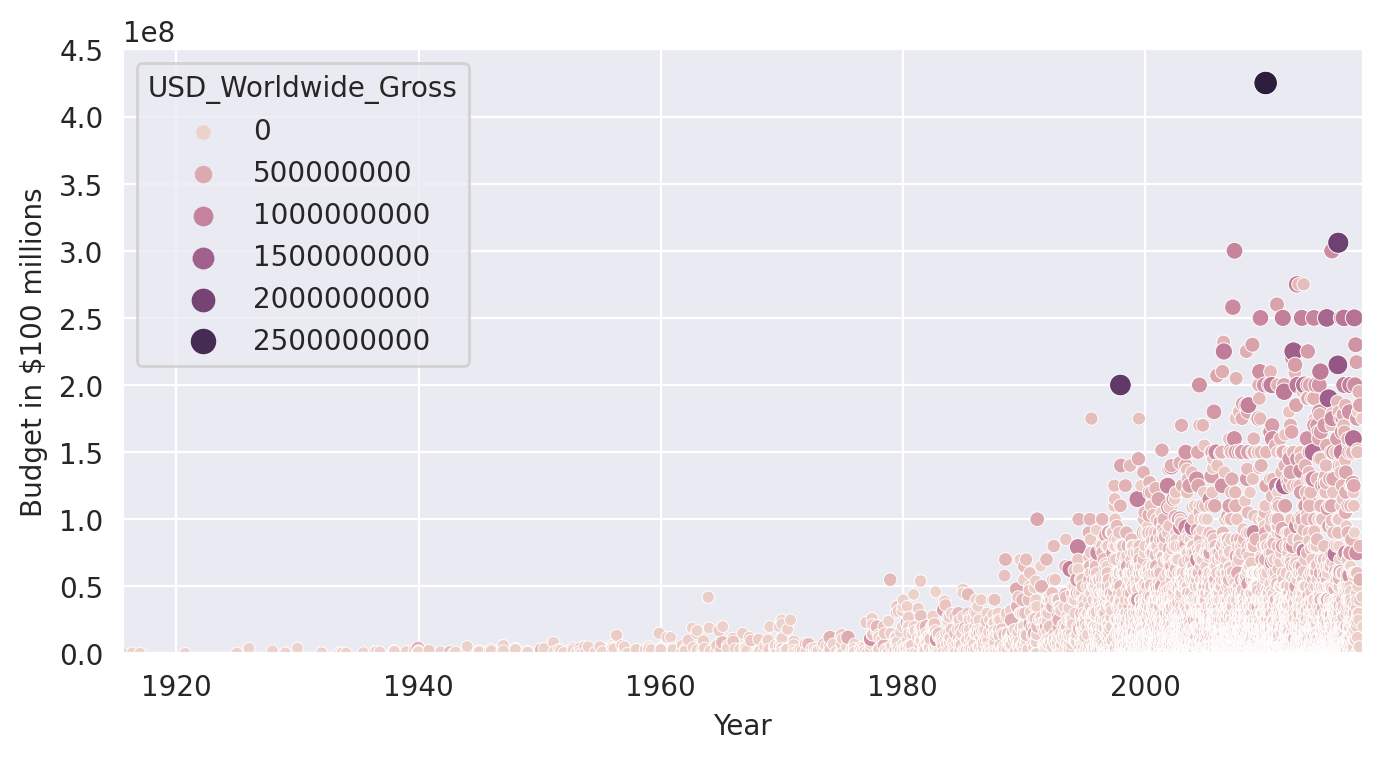

In [108]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [110]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [113]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
old_films.describe()
old_films.sort_values('USD_Production_Budget',ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue_Domestic,Revenue_Worldwide,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,15000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,-4526667,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,11678778,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

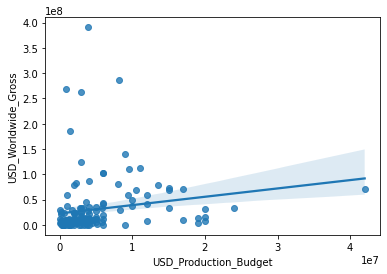

In [114]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

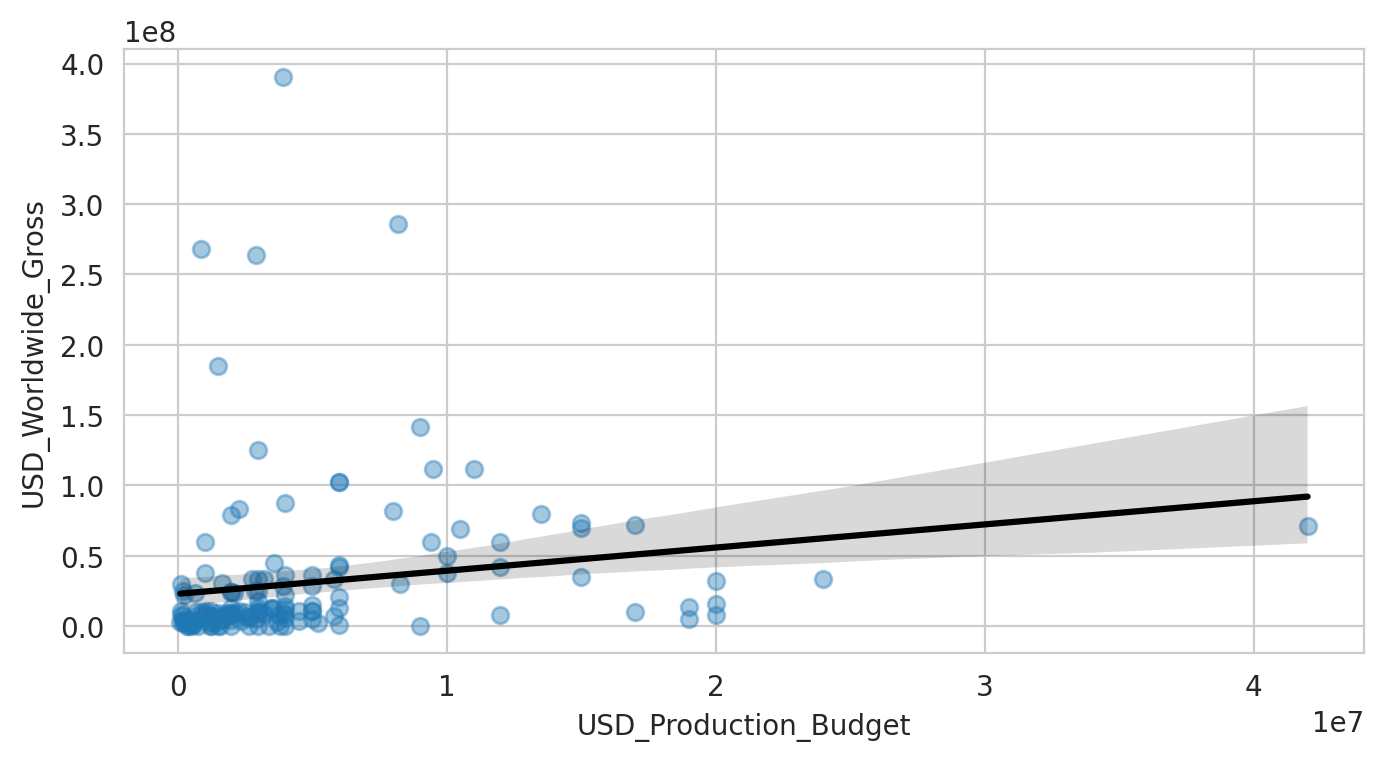

In [116]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

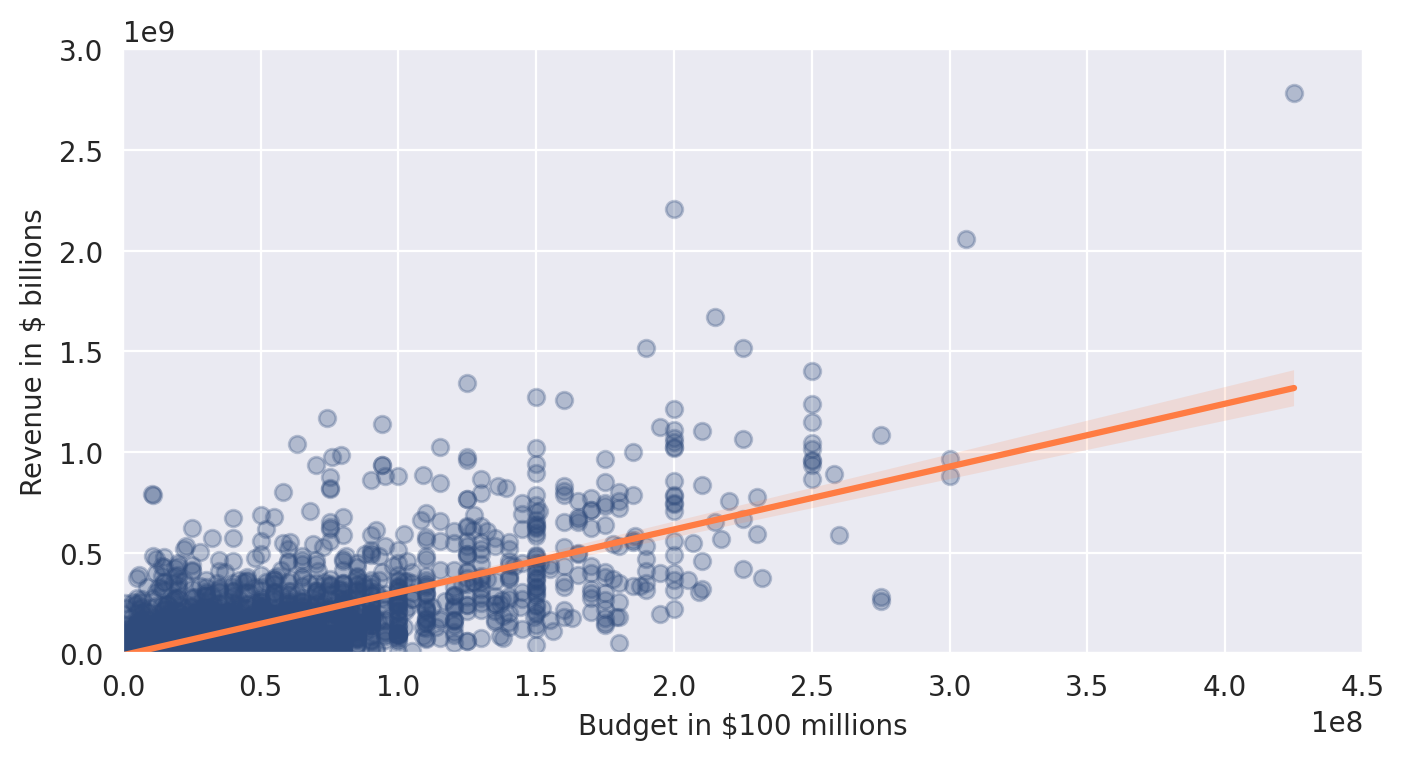

In [117]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [119]:
regression = LinearRegression()

In [120]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X,y)

LinearRegression()

In [122]:
#Theta zero
regression.intercept_

array([22821538.63508039])

In [123]:
#Theta one
regression.coef_

array([[1.64771314]])

In [124]:
#R-Squared
regression.score(X,y) #model only explains apox 3% of variance in old movies

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [128]:
budget = 350000000
revenue = regression.intercept_[0] + regression.coef_[0] * budget
print(f'You model estimated a revenue of {revenue[0]:.10} for a budget of {budget}')

You model estimated a revenue of 599521139.0 for a budget of 350000000
